# Data Exploration and feature selection

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SOME PRELIMINARY ANALISY do not consider the death column
df_dev = pd.read_csv('development.csv')
df_eval = pd.read_csv('evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)

## ADDRESSING THE IMBALANCE OF THE DATASET

<AxesSubplot:ylabel='death'>

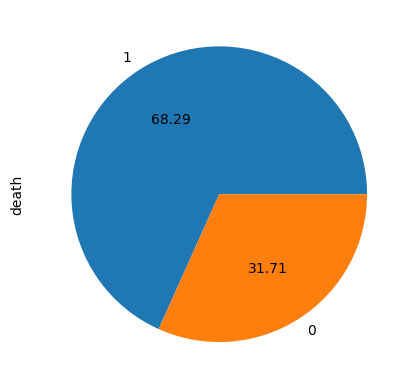

In [3]:
df_dev["death"].value_counts().plot.pie(autopct = '%.2f')

## REPLACING NAN VALUES

In [4]:
# I delete the line where I have all nulls for the following features, they are significant data and eliminating it
# I don't lose information as the dataset is huge in comparison
df[df["scoma"].isna()][['sps','aps','surv2m','surv6m']]
index_to_delete = df[df['Id'] == 7246].index
df.drop(index_to_delete, inplace=True)

In [5]:
df['race'].fillna('white', inplace=True) #replace with mode
df['charges'].fillna(df['charges'].mean(), inplace=True) #replace with mean
df['ph'].fillna(df['ph'].mean(), inplace=True) #replace with mean
df['income'].fillna('under $11k', inplace=True) #replace with mode

df['prg2m'].fillna(df['surv2m'], inplace=True)
df['prg6m'].fillna(df['surv6m'], inplace=True)
df['adlp'].fillna(df['adlsc'], inplace=True)

In [6]:
def fill_nan_mean(columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

In [7]:
columns_to_fill = ['meanbp','wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'glucose', 'bun', 'urine']
df = fill_nan_mean(columns_to_fill)

In [8]:
df[df['avtisst'].isna()]
df = fill_nan_mean(['avtisst'])

In [9]:
df['dnr'].fillna('no dnr', inplace=True) #replace with mode
df['dnrday'].fillna(0, inplace=True) #replace with mode

## PRICES CORRELATION MATRIX

In [10]:
# PLOT THE CORRELATION MATRIX OF THE FEATURE ABOUT MONEY
features = ['edu', 'charges', 'totcst', 'totmcst', 'avtisst']  # list of feature names

# select the features from the DataFrame
feature_df = df[features]

# calculate the correlation matrix
corr_matrix = feature_df.corr()

# print the correlation matrix
print(corr_matrix)

              edu   charges    totcst   totmcst   avtisst
edu      1.000000  0.111618  0.090229  0.099033  0.024005
charges  0.111618  1.000000  0.842683  0.775301  0.444198
totcst   0.090229  0.842683  1.000000  0.948995  0.485162
totmcst  0.099033  0.775301  0.948995  1.000000  0.503908
avtisst  0.024005  0.444198  0.485162  0.503908  1.000000


## DZ CORELATION

In [12]:
# I CAN USE THE CHI-SQUimport pandas as pd
from scipy.stats import chi2_contingency

# assume 'df' is your DataFrame with two categorical columns: 'A' and 'B'

# create a contingency table
contingency_table = pd.crosstab(df['dzclass'], df['dzgroup'])

# perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-Square statistic: 27312.0
p-value: 0.0
Degrees of freedom: 21
Expected frequencies: [[1631.16915641  643.83369947  448.87324253  235.80931459  237.66608084
   276.65817223  421.48594025  330.50439367]
 [1104.68673111  436.02746046  303.99318981  159.69859402  160.95606327
   187.3629174   285.44551845  223.82952548]
 [ 548.09753954  216.33787346  150.82820738   79.23550088   79.85940246
    92.96133568  141.62565905  111.05448155]
 [ 230.04657293   90.80096661   63.30536028   33.25659051   33.51845343
    39.01757469   59.44288225   46.6115993 ]]


## SURV CORRELATION

In [13]:
features = ['prg2m', 'prg6m', 'surv2m', 'surv6m']  # list of feature names

# select the features from the DataFrame
feature_df = df[features]

# calculate the correlation matrix
corr_matrix = feature_df.corr()

# print the correlation matrix
print(corr_matrix)

           prg2m     prg6m    surv2m    surv6m
prg2m   1.000000  0.905962  0.654553  0.618413
prg6m   0.905962  1.000000  0.601165  0.619634
surv2m  0.654553  0.601165  1.000000  0.960406
surv6m  0.618413  0.619634  0.960406  1.000000


In [14]:
from scipy.stats import pointbiserialr

# split the DataFrame into two groups: null and int
grouped = df.groupby(df['death'].notnull())

# get the group with null values
df_null = grouped.get_group(False)

# get the group with int values
df_int = grouped.get_group(True)

# Calculate the point-biserial correlation
c1, p_value = pointbiserialr(df_int["prg2m"], df_int["death"])
c2, p_value = pointbiserialr(df_int["prg6m"], df_int["death"])
c3, p_value = pointbiserialr(df_int["surv2m"], df_int["death"])
c4, p_value = pointbiserialr(df_int["surv6m"], df_int["death"])

print(f"Point-biserial correlation: {c1,c2,c3,c4}")
#print(f"P-value: {p_value}")

Point-biserial correlation: (-0.3158525092206605, -0.3853067612099463, -0.32139135457507595, -0.3744225340125355)


## Drop useless columns

In [15]:
import pandas as pd

def drop_columns(df, columns_to_drop):
    """
    Drop specified columns from a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame to drop columns from.
    columns_to_drop (list of str): List of column names to drop.

    Returns:
    pd.DataFrame: DataFrame with dropped columns.
    """
    return df.drop(columns=columns_to_drop)

In [16]:
columns_to_drop = ['dzclass','totcst', 'totmcst','edu','adls','adlsc','income','dnrday','prg2m','surv2m']
df = drop_columns(df, columns_to_drop)

## Handling outliers

In [17]:
#numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numerical_features = ['age', 'num.co', 'scoma', 'charges', 'avtisst', 'sps', 'aps',
       'surv6m', 'hday', 'prg6m', 'meanbp', 'wblc', 'hrt', 'resp',
       'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun',
       'urine', 'adlp']

In [18]:
df_capped = df

In [19]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

## Standardising

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_capped[numerical_features] = scaler.fit_transform(df_capped[numerical_features])

## Encoding binary attributes

In [21]:
from sklearn.preprocessing import LabelEncoder

def transform_binary_features(features):
    le = LabelEncoder()
    for feature in features:
        df_capped[feature] = le.fit_transform(df_capped[feature])
    return df_capped

In [22]:
to_encode = ['sex','dementia'] #ho tolto diabete, è legato a glucosio
df_en1 = transform_binary_features(to_encode)

In [23]:
df_en2 = pd.get_dummies(df_en1, columns=['ca', 'race', 'dzgroup','dnr'])

### Furter correlation exploration

<AxesSubplot:>

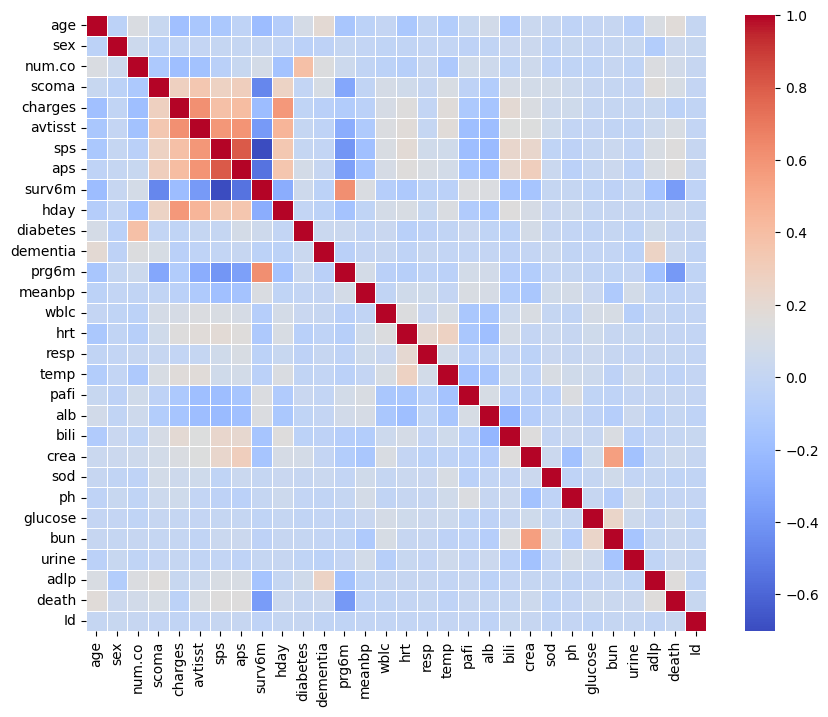

In [24]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# setting the evaluation metric

In [25]:
from sklearn.metrics import make_scorer, f1_score
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Logistic regressor

In [26]:
df = df_en2.copy(deep=True)

In [27]:
df_drop = df.drop(columns=['glucose', 'ph']) ##it impreves f1

## Resplit the dataset in dev and eval

In [28]:
# create a mask for death == 1 or 0
mask_death_10 = df_drop['death'].isin([0, 1])
# create a mask for death is null
mask_death_null = df_drop['death'].isna()

# create two separate DataFrames
df_dev = df_drop[mask_death_10]
df_eval = df_drop[mask_death_null]

In [29]:
from sklearn.model_selection import train_test_split

# select the features (X) and target variable (y)
X = df_dev.drop('death', axis=1)  # features
y = df_dev['death']  # target variable

In [30]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (5826, 46)
y_train shape: (5826,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [32]:
# Train Logistic Regression with class weights
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)

f1_lr = cross_val_score(lr_model, X, y, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

F1 Score for Logistic Regression: 0.7325779363868604


## Feature importance

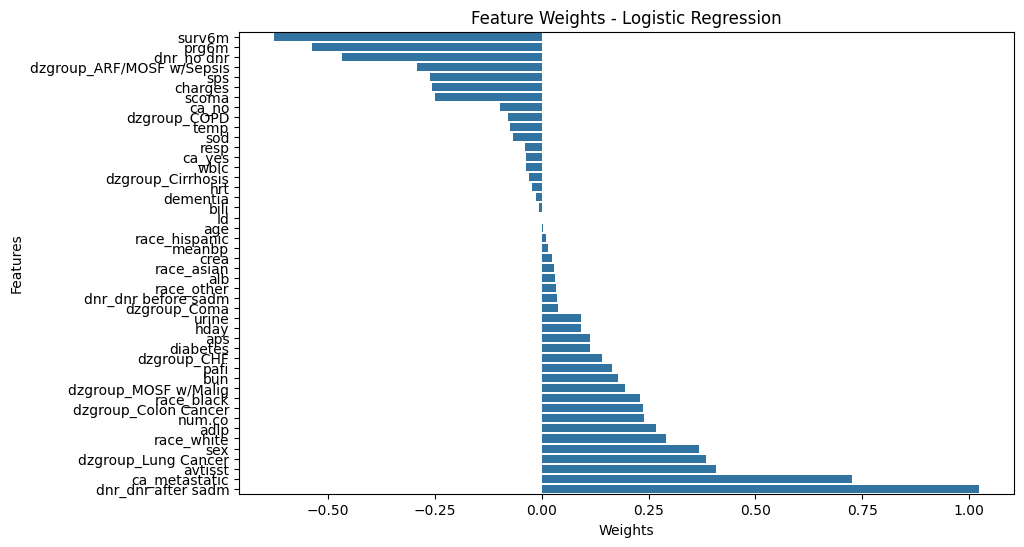

In [33]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature names and weights
feature_names = X_train.columns.tolist()
feature_weights = lr_model.coef_[0]

# Create a dataframe for seaborn
feature_weights_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_weights
})

# Create a bar plot of feature weights using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Weight", y="Feature", data=feature_weights_df.sort_values(by='Weight', ascending=True))
plt.title("Feature Weights - Logistic Regression")
plt.xlabel("Weights")
plt.ylabel("Features")
plt.show()

In [34]:
# Calculate the absolute value of the weights
feature_weights_df['Weight'] = feature_weights_df['Weight'].abs()

# Sort the dataframe by weight in ascending order
least_important_features = feature_weights_df.sort_values(by='Weight', ascending=True)

# Select the 20 least important features
least_important_features = least_important_features.head(20)

#print("20 Least Important Features and their Weights:")
#print(least_important_features)

In [35]:
#i drop the 20 less significant featurs, 20 get the best f1
X_new = drop_columns(X,least_important_features["Feature"][:20])
y_new = drop_columns(y,least_important_features["Feature"][:20])

## Evaluation post embedded feature selection

In [36]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2,stratify=y_new, random_state=42)

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (5826, 26)
y_train shape: (5826,)


In [37]:
# Train Logistic Regression with class weights
lr_model2 = LogisticRegression()
lr_model2.fit(X_train, y_train)
# Predict and evaluate
y_pred_lr = lr_model2.predict(X_test)

#f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_lr = cross_val_score(lr_model2, X_new, y_new, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

F1 Score for Logistic Regression: 0.7418327573045141


## Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definire il modello
logistic = LogisticRegression(max_iter=10000)

# Definire la griglia dei parametri con combinazioni compatibili
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'solver': ['lbfgs', 'newton-cg'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}
]

# Eseguire Grid Search
grid_search = GridSearchCV(logistic, param_grid=param_grid, cv=5, scoring=f1_macro_scorer, n_jobs=-1)

# Eseguire il fitting
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Best parameters found: ", grid_search.best_params_)
print("Best f1: ", grid_search.best_score_)


Best parameters found:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best f1:  0.7443299984027816


## Evaluation

In [ ]:
y_pred_lr = lr_model2.predict(df_eval[X_new.columns])

In [ ]:
predictions = pd.DataFrame({'Id': df_eval.drop(columns=["death"]).Id, 'Predicted': y_pred_lr})

In [ ]:
predictions.to_csv('submission.csv', index=False)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,shuffle=True, \
                                                    test_size=0.2)

In [43]:
# Create a Random Forest model
rf_model = RandomForestClassifier(100,random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

f1_lr = cross_val_score(rf_model, X, y, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

F1 Score for Logistic Regression: 0.7346281418675261


## Feature importance

In [44]:
importances = rf_model.feature_importances_

In [45]:
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

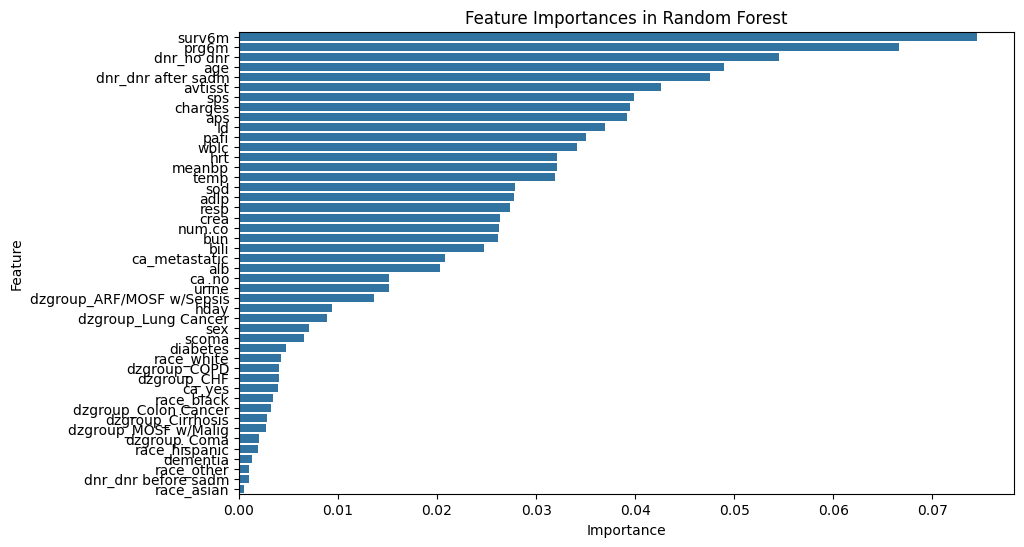

In [46]:
import seaborn as sns

# Convert to a DataFrame for easier plotting
importances_df = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest')
plt.show()

In [47]:
top_features = [feature for feature, importance in feature_importances[:46-20]]

In [48]:
X_new = X[top_features]

### Evaluation

In [49]:
# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42,shuffle=True, \
                                                    test_size=0.2)

In [50]:
# Create a Random Forest model
rf_model = RandomForestClassifier(100,random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

f1_lr = cross_val_score(rf_model, X, y, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

F1 Score for Logistic Regression: 0.7346281418675261


## Handling imbalance

### Penalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, \
                                                    test_size=0.2)

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

f1_lr = cross_val_score(rf_model, X, y, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

### SMOTE

In [51]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [52]:
X_smote, y_smote = SMOTE().fit_resample(X,y)

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=42, \
                                                    test_size=0.2)

In [54]:
# Create a Random Forest model
rf_model = RandomForestClassifier(100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

f1_lr = cross_val_score(rf_model, X, y, cv=5, scoring=f1_macro_scorer).mean()
print(f'F1 Score for Logistic Regression: {f1_lr}')

F1 Score for Logistic Regression: 0.7346281418675261


## PCA

In [55]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
# Create a pipeline with PCA and RandomForestClassifier
pipe = Pipeline([
    ('pca', PCA()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [2, 5,10,20,30,40],  # Number of principal components to keep
    'clf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'clf__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring=f1_macro_scorer)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'clf__max_depth': None, 'clf__n_estimators': 200, 'pca__n_components': 40}
Best Cross-validation Accuracy: 0.833101802228357


## Tuning

In [57]:
#i will tune the best result of the feature importance step

In [58]:
# Number of trees in random forest
n_estimators = [200] #from pca
# Maximum number of levels in tree
max_depth = [None] #from pca
# Method of selecting samples for training each tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [59]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'criterion': ['gini', 'entropy'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
rf_Model = RandomForestClassifier(random_state=42)
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid,\
                       cv = 5, verbose=2, n_jobs = -1, scoring=f1_macro_scorer)

In [61]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  14.5s
[CV] END bootstrap=True, criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [62]:
rf_Grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [63]:
print (f'Train f1 - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test f1 - : {rf_Grid.score(X_test,y_test):.3f}')

Train f1 - : 1.000
Test f1 - : 0.844
